In [1]:
import tensortools as tt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ground truth model
N, R = 20, 3
factors = [np.random.randn(N, R) for _ in range(3)]

# noisy data
data = np.einsum('ir,jr,kr->ijk', *factors) # low-rank part
data += 0.1*np.random.randn(*data.shape) # add noise

In [3]:
als_results = tt.cp_batch_fit(data, range(1,9), replicates=10, tol=1e-6)
als_factors = als_results[R]['factors'][0]
als_factors = tt.align_factors(als_factors, factors)[0]

Optimizing rank-1 models.
   10/10 converged, min error = 0.6978, max error = 0.9064, mean error = 0.7990
Optimizing rank-2 models.
   10/10 converged, min error = 0.4229, max error = 0.7170, mean error = 0.5482
Optimizing rank-3 models.
   10/10 converged, min error = 0.0428, max error = 0.0428, mean error = 0.0428
Optimizing rank-4 models.
   10/10 converged, min error = 0.0427, max error = 0.0427, mean error = 0.0427
Optimizing rank-5 models.
   10/10 converged, min error = 0.0424, max error = 0.0426, mean error = 0.0426
Optimizing rank-6 models.
   10/10 converged, min error = 0.0424, max error = 0.0425, mean error = 0.0424
Optimizing rank-7 models.
   10/10 converged, min error = 0.0420, max error = 0.0424, mean error = 0.0423
Optimizing rank-8 models.
   10/10 converged, min error = 0.0420, max error = 0.0422, mean error = 0.0422


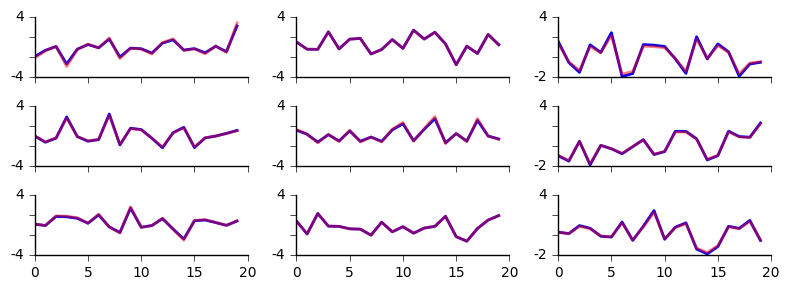

In [6]:
fig, axes = tt.plot_factors(factors, line_kw=dict(color='b', lw=2))
tt.plot_factors(als_factors, line_kw=dict(color='r', lw=2, alpha=0.5), fig=fig);

(<matplotlib.figure.Figure at 0x1112e7518>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x110c11fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1113b2358>], dtype=object))

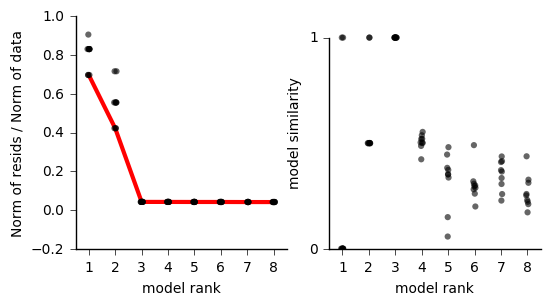

In [7]:
tt.plot_scree(als_results)